# **Disease Detection using Symptoms and Treatment recommendation**

This notebook contains all the models applied on the scraped dataset and contains the accuracy comparison plot.


In [1]:
# all necessary imports
import warnings
from decimal import Decimal
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
# ignore warnings generated due to usage of old version of tensorflow
warnings.simplefilter("ignore")

**Disease Symptom dataset** was created in a separate python program.

**Dataset scrapping** was done using **NHP website** and **wikipedia data**

In [2]:
# Load Dataset scraped from NHP (https://www.nhp.gov.in/disease-a-z) & Wikipedia
# Scrapping and creation of dataset csv is done in a separate program
df_comb = pd.read_csv("dis_sym_dataset_comb.csv")

# creation of features and label for training the models
X = df_comb.iloc[:, 1:]
Y = df_comb.iloc[:, 0:1]

*Train Test Split*

In [3]:
# splitting data for training the classifiers and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10)

In [4]:
# lists used for accuracy plots
accuracy_list = []
cross_accuracy_list = []
model_list = []

# **Multinomial Naive Bayes Classifier**

est un algorithme d'apprentissage supervisé qui utilise le théorème de Bayes pour prédire la classe d'un échantillon en se basant sur la fréquence des occurrences de ses caractéristiques dans les différentes classes possibles.
alpha: un paramètre de régularisation utilisé pour éviter le surapprentissage (overfitting) elle permet permet de réduire l'influence des caractéristiques rares ou peu informatives Plus la valeur d'alpha est grande, plus la régularisation est forte.


Best parameters: {'alpha': 0.2, 'fit_prior': False}


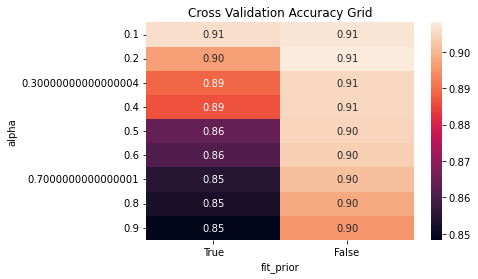

Best parameters: {'alpha': 0.2, 'fit_prior': False}
Accuracy (MNB) : 90.38%
Cross Validation Accuracy (MNB): 90.81%


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# define the parameter grid to search over
param_grid = {
    'alpha': np.arange(0.1, 1.0, 0.1),
    'fit_prior': [True, False],
}

# create the GridSearchCV object
mnb_grid = GridSearchCV(MultinomialNB(), param_grid, cv=5)

# fit the grid to the data
mnb_grid.fit(x_train, y_train)

# get the best estimator and its parameters
best_mnb = mnb_grid.best_estimator_
best_params = mnb_grid.best_params_

# print the best parameters
print(f"Best parameters: {best_params}")

# create a grid of alpha values and fit_prior values
alpha_vals = np.arange(0.1, 1.0, 0.1)
fit_prior_vals = [True, False]
grid = np.zeros((len(alpha_vals), len(fit_prior_vals)))

# loop over the alpha and fit_prior values and calculate the cross-validation score
for i, alpha in enumerate(alpha_vals):
    for j, fit_prior in enumerate(fit_prior_vals):
        mnb = MultinomialNB(alpha=alpha, fit_prior=fit_prior)
        scores_mnb = cross_val_score(mnb, X, Y, cv=5)
        score = scores_mnb.mean()
        grid[i, j] = score

# plot the grid as a heatmap
sns.heatmap(grid, xticklabels=fit_prior_vals, yticklabels=alpha_vals, annot=True, fmt='.2f')
plt.xlabel("fit_prior")
plt.ylabel("alpha")
plt.title("Cross Validation Accuracy Grid")
plt.show()



# print the best parameters
print(f"Best parameters: {best_params}")

# Multinomial NB Classifier with best parameters
mnb = best_mnb
mnb = mnb.fit(x_train, y_train)
# prediction of labels for the test data
mnb_pred = mnb.predict(x_test)
# calculation of accuracy score based on predictions performed
# converting to Decimal as rounding with float is inaccurate
acc_mnb = round(Decimal(accuracy_score(y_test, mnb_pred) * 100), 2)
accuracy_list.append(acc_mnb)
model_list.append("MNB")
print(f"Accuracy (MNB) : {acc_mnb}%")

# Cross Validation Accuracy MNB with best parameters
# performing cross validation with 5 different splits
scores_mnb = cross_val_score(best_mnb, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_mnb.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (MNB): {score}%")

# **Random Forest Classifier**

RF classifier is an estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and take the average to improve predicting accuracy.

Best parameters: {'max_depth': None, 'n_estimators': 50}


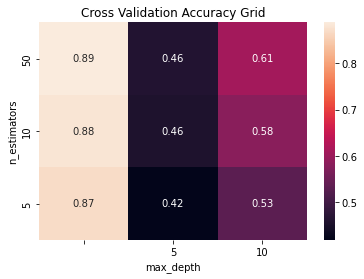

Best parameters: {'max_depth': None, 'n_estimators': 50}
Accuracy (RF) : 87.56%
Cross Validation Accuracy (RF): 88.79%


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from decimal import Decimal

# define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 10, 5],
    'max_depth': [None, 5, 10],
}

# create the GridSearchCV object
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

# fit the grid to the data
rf_grid.fit(x_train, y_train)

# get the best estimator and its parameters
best_rf = rf_grid.best_estimator_
best_params = rf_grid.best_params_

# print the best parameters
print(f"Best parameters: {best_params}")

# create a grid of n_estimators and max_depth values
n_est_vals = [50, 10, 5]
max_depth_vals = [None, 5, 10]
grid = np.zeros((len(n_est_vals), len(max_depth_vals)))

# loop over the n_estimators and max_depth values and calculate the cross-validation score
for i, n_est in enumerate(n_est_vals):
    for j, max_depth in enumerate(max_depth_vals):
        rf = RandomForestClassifier(n_estimators=n_est, max_depth=max_depth)
        scores_rf = cross_val_score(rf, X, Y, cv=5)
        score = scores_rf.mean()
        grid[i, j] = score

# plot the grid as a heatmap
sns.heatmap(grid, xticklabels=max_depth_vals, yticklabels=n_est_vals, annot=True, fmt='.2f')
plt.xlabel("max_depth")
plt.ylabel("n_estimators")
plt.title("Cross Validation Accuracy Grid")
plt.show()

# print the best parameters
print(f"Best parameters: {best_params}")

# Random Forest Classifier with best parameters
rf = best_rf
rf = rf.fit(x_train, y_train)
# prediction of labels for the test data
rf_pred = rf.predict(x_test)
# calculation of accuracy score based on predictions performed
# converting to Decimal as rounding with float is inaccurate
acc_rf = round(Decimal(accuracy_score(y_test, rf_pred) * 100), 2)
accuracy_list.append(acc_rf)
model_list.append("RF")
print(f"Accuracy (RF) : {acc_rf}%")

# Cross Validation Accuracy RF with best parameters
# performing cross validation with 5 different splits
scores_rf = cross_val_score(best_rf, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_rf.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (RF): {score}%")


# **K-Nearest Neighbor Classifier**

The principle behind nearest neighbor method is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. No. of samples used here is 7.

Best parameters: {'n_neighbors': 9, 'weights': 'uniform'}


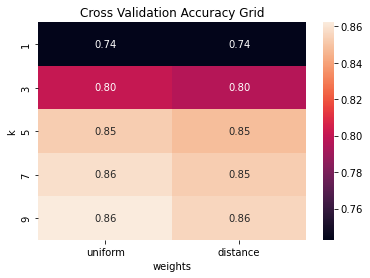

Best parameters: {'n_neighbors': 9, 'weights': 'uniform'}
Accuracy (KNN) : 86.54%
Cross Validation Accuracy (KNN): 86.21%


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

# define the parameter grid to search over
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}

# create the GridSearchCV object
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# fit the grid to the data
knn_grid.fit(x_train, y_train)

# get the best estimator and its parameters
best_knn = knn_grid.best_estimator_
best_params = knn_grid.best_params_

# print the best parameters
print(f"Best parameters: {best_params}")

# create a grid of k and weights
k_vals = [1, 3, 5, 7, 9]
weight_vals = ['uniform', 'distance']
grid = np.zeros((len(k_vals), len(weight_vals)))

# loop over the k and weights and calculate the cross-validation score
for i, k in enumerate(k_vals):
    for j, weight in enumerate(weight_vals):
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight)
        scores_knn = cross_val_score(knn,  X, Y, cv=5)
        score = scores_knn.mean()
        grid[i, j] = score

# plot the grid as a heatmap
sns.heatmap(grid, xticklabels=weight_vals, yticklabels=k_vals, annot=True, fmt='.2f')
plt.xlabel("weights")
plt.ylabel("k")
plt.title("Cross Validation Accuracy Grid")
plt.show()

# print the best parameters
print(f"Best parameters: {best_params}")

# KNN Classifier with best parameters
knn = best_knn
knn = knn.fit(x_train, y_train)
# prediction of labels for the test data
knn_pred = knn.predict(x_test)
# calculation of accuracy score based on predictions performed
# converting to Decimal as rounding with float is inaccurate
acc_knn = round(Decimal(accuracy_score(y_test, knn_pred) * 100), 2)
accuracy_list.append(acc_knn)
model_list.append("KNN")
print(f"Accuracy (KNN) : {acc_knn}%")

# Cross Validation Accuracy KNN with best parameters
# performing cross validation with 5 different splits
scores_knn = cross_val_score(best_knn, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_knn.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (KNN): {score}%")




# **Logistic Regression Classifier**

Logistic Regression uses OvR (One Vs Rest) approach when classification is multi class.
La régularisation est une technique d'optimisation utilisée dans l'apprentissage automatique pour réduire le surapprentissage (overfitting) d'un modèle.

Best parameters: {'C': 0.001, 'penalty': 'none'}


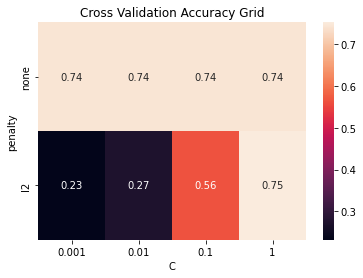

Best parameters: {'C': 0.001, 'penalty': 'none'}
Accuracy (Logistic Regression) : 88.35%
Cross Validation Accuracy (Logistic Regression): 87.84%


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

# define the parameter grid to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1],
    'penalty':['none', 'l2']
}

# create the GridSearchCV object
logreg_grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# fit the grid to the data
logreg_grid.fit(x_train, y_train)

# get the best estimator and its parameters
best_logreg = logreg_grid.best_estimator_
best_params = logreg_grid.best_params_

# print the best parameters
print(f"Best parameters: {best_params}")

# create a grid of penalty and C values
penalty_vals = ['none', 'l2']
C_vals = [0.001, 0.01, 0.1, 1]
grid = np.zeros((len(penalty_vals), len(C_vals)))

# loop over the penalty and C values and calculate the cross-validation score
for i, penalty in enumerate(penalty_vals):
    for j, C_val in enumerate(C_vals):
        logreg = LogisticRegression(C=C_val, penalty=penalty)
        scores_logreg = cross_val_score(logreg, x_test, y_test, cv=5)
        score = scores_logreg.mean()
        grid[i, j] = score

# plot the grid as a heatmap
sns.heatmap(grid, xticklabels=C_vals, yticklabels=penalty_vals, annot=True, fmt='.2f')
plt.xlabel("C")
plt.ylabel("penalty")
plt.title("Cross Validation Accuracy Grid")
plt.show()

# print the best parameters
print(f"Best parameters: {best_params}")

# Logistic Regression with best parameters
logreg = best_logreg
logreg = logreg.fit(x_train, y_train)
# prediction of labels for the test data
logreg_pred = logreg.predict(x_test)
# calculation of accuracy score based on predictions performed
# converting to Decimal as rounding with float is inaccurate
acc_logreg = round(Decimal(accuracy_score(y_test, logreg_pred) * 100), 2)
accuracy_list.append(acc_logreg)
model_list.append("Logistic Regression")
print(f"Accuracy (Logistic Regression) : {acc_logreg}%")

# Cross Validation Accuracy Logistic Regression with best parameters
# performing cross validation with 5 different splits
scores_logreg = cross_val_score(best_logreg, X, Y, cv=5)
# mean of cross val score (accuracy)
score = round(Decimal(scores_logreg.mean() * 100), 2)
cross_accuracy_list.append(score)
print(f"Cross Validation Accuracy (Logistic Regression): {score}%")


# **Accuracy Comparison Plot for all the classifiers**

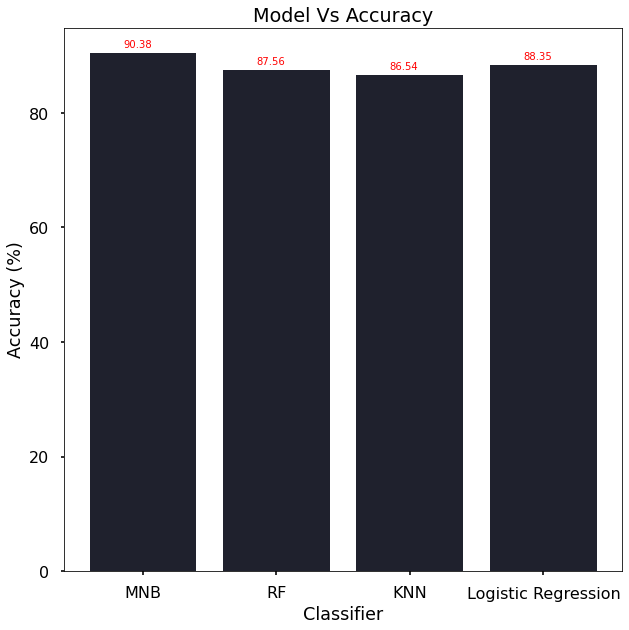

In [9]:
# comparison plot for all classifiers with their accuracy
plt.style.use('seaborn-poster')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
plt.title("Model Vs Accuracy")
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.bar(model_list, accuracy_list, color='#1f212d')
for i, j in enumerate(accuracy_list):
    ax.text(float(i)-0.15, float(j)+1, str(j), color='red')
plt.show()

# **Cross Validation Accuracy Comparison Plot for all the classifiers**

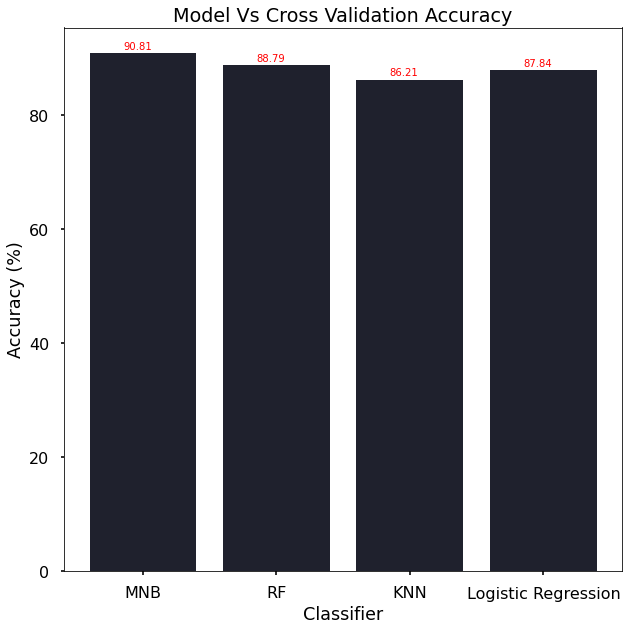

In [10]:
# comparison plot for all classifiers with their accuracy
plt.style.use('seaborn-poster')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
plt.title("Model Vs Cross Validation Accuracy")
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')
plt.bar(model_list, cross_accuracy_list, color='#1f212d')
for i, j in enumerate(cross_accuracy_list):
    ax.text(float(i)-0.15, float(j)+0.7, str(j), color='red')
plt.show()